### Behavioral Clonning

#### Model used after trying 10 different architectures with different parameters and tunning of those

#### Libraries : Image Processing and visualization

In [372]:
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from collections import Counter



#### Libraries : Neural Network Tools

In [373]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, pooling, MaxPooling2D, Activation, Dropout, BatchNormalization
from keras.layers import Cropping2D
from keras.initializers import TruncatedNormal
from keras.layers.advanced_activations import ELU

#### The Data

In [374]:
lines = []
#with open('/Users/William/Workspace/AI/Self Driving Car/Behavioral Clonning/CarND-Behavioral-Cloning-P3-master/data_t/driving_log.csv') as csvfile:
with open('/Users/William/simulatorData/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print('Rows from the CSV \n', len(lines))


images = []
measurements = []

for counter, line in enumerate(lines,0):
    #camera = np.random.randint(3, size=1)
    
    # center images
    
    center_image_source_path = line[0]
    filename = center_image_source_path.split('/')[-1]
    current_path = '/Users/William/simulatorData/IMG/'+ filename
    center_image = plt.imread(current_path)
    images.append(center_image)
    measurement = float(line[3])
    measurements.append(measurement)
    
    # left image
    
    left_image_source_path = line[1]
    filename = left_image_source_path.split('/')[-1]
    current_path = '/Users/William/simulatorData/IMG/'+ filename
    left_image = plt.imread(current_path)
    images.append(left_image)
    measurement = float(line[3])
    measurements.append(measurement)
    
    
    # right image
    
    right_image_source_path = line[2]
    filename = left_image_source_path.split('/')[-1]
    current_path = '/Users/William/simulatorData/IMG/'+ filename
    right_image = plt.imread(current_path)
    images.append(right_image)
    measurement = float(line[3])
    measurements.append(measurement)
    
    
    
#assert counter-1 == len(lines)  
    
X_train = np.array(images)
y_train = np.array(measurements)



Rows from the CSV 
 1771


In [377]:
print('Training Data without augmentation: images \n',len(X_train) )
print('Training Data without augmentation:  Angles measurements \n', len(y_train))
print('one Line from the CSV File: ', line[2])


Training Data without augmentation: images 
 5313
Training Data without augmentation:  Angles measurements 
 5313
one Line from the CSV File:  /Users/William/simulatorData/IMG/right_2018_10_05_19_33_29_039.jpg


#### The Data: Augmentation

In [378]:
augmented_images, augmented_measurements = [], []

for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(np.fliplr(image))
    augmented_measurements.append(measurement*-1.0)
    
X_train_aug = np.array(augmented_images)
y_train_aug = np.array(augmented_measurements)



Training Data with augmentation: images 
 10626
Training Data with augmentation:  measurements 
 10626
0.0


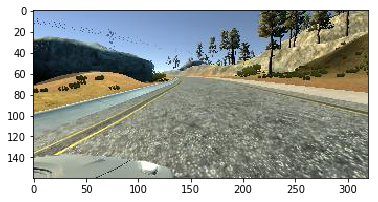

In [379]:
print('Training Data with augmentation: images \n', len(X_train_aug))
print('Training Data with augmentation:  measurements \n', len(y_train_aug))
plt.imshow(X_train_aug[-1])
print(y_train_aug[-100])

#### The Data: Augmentation


0.0 Steer angle


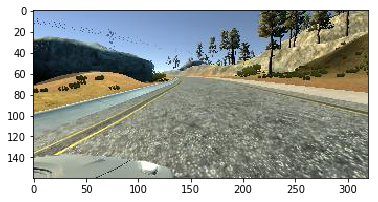

In [382]:

plt.imshow(X_train_aug[-1])
print(y_train_aug[-2], 'Steer angle')



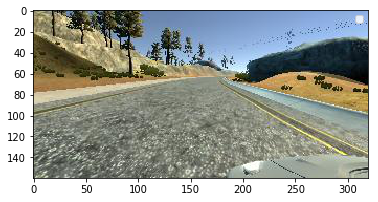

In [383]:
plt.legend('flipped')
plt.imshow(X_train_aug[-2])

### Distribution of the Labels (steering angles)

### Balancing the dataset

In [384]:
ocurrences_in_data_set = Counter(y_train_aug)
top_imbalancers = ocurrences_in_data_set.most_common(3)
print(top_imbalancers)

[(0.0, 7794), (-1.0, 234), (1.0, 234)]


In [385]:
ocurrences_in_data_set = Counter(bal_aug_y_train)
top_imbalancers = ocurrences_in_data_set.most_common(4)
print(top_imbalancers)

[(-0.0, 6974), (1.0, 103), (-1.0, 97), (-0.005882353, 71)]


In [386]:
#X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

### The Model
###### Model with regularization techniques applied. This model was implemented upon NVIDIA paper

Train on 8500 samples, validate on 2126 samples
Epoch 1/4
8500/8500 [==============================] - 96s 11ms/step - loss: 0.0705 - val_loss: 0.0550
Epoch 2/4
8500/8500 [==============================] - 87s 10ms/step - loss: 0.0498 - val_loss: 0.0540
Epoch 3/4
8500/8500 [==============================] - 84s 10ms/step - loss: 0.0420 - val_loss: 0.0387
Epoch 4/4
8500/8500 [==============================] - 89s 10ms/step - loss: 0.0377 - val_loss: 0.0377
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_60 (Lambda)           (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_59 (Cropping2D)   (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_284 (Conv2D)          (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_285 (

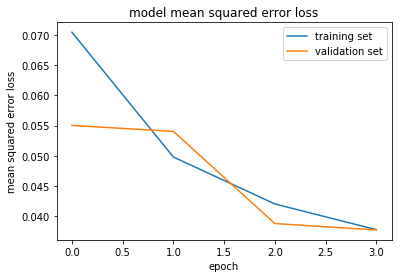

In [391]:
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
model = Sequential()

#### The Layers ####
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping= ((70, 25), (0,0))))
model.add(Conv2D(24, (5, 5), strides=(2,2),  activation= 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(1,1), activation = 'relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=(1,1), activation = 'relu'))

######## End of Convolutions ######################



#model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())


########### Fully Connected Layers ##################
model.add(Dense(100))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(50))
#model.add(Dropout(0.25))
#model.add(BatchNormalization())
model.add(Dense(10))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(1))

#### End: The Layers ####

# Compiling
model.compile(loss = 'mse', optimizer = 'adam')
# The Loss
history_object = model.fit(X_train_aug, y_train_aug, validation_split = 0.2, shuffle = True, epochs = 4, verbose = 1) 
model.summary()
# Visualization
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()



# Saving the Model
model.save('model14_cam.h5')